<a href="https://colab.research.google.com/github/KimDongChan0908/Artificial-Intelligence-Programming/blob/Week-4-Class/Transpose_%26_BroadCasting_%26_grad_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import tensorflow as tf
import numpy as np

for i in [torch, tf, np]:
  print(i.__name__, i.__version__)

torch 2.2.1+cu121
tensorflow 2.15.0
numpy 1.25.2


#Transpose



Transpose Matrix(전치행렬) = 기존 행렬 A의 행, 열값을 열 행값으로 바꿔주는 것이다.


If) Tensor의 rank가 2보다 클 경우 rank 의 수만큼 축이 존재하니, 여러 축들 중에서 2개의 서로의 위치를 바꾸는것이라고 보면 된다.

In [9]:
a = np.random.rand(2,4)
t1 = np.transpose(a)
t2 = a.T

print(a.shape)
print(t1.shape)
print(t2.shape)

print('---------')
print(a)
print(t2)
t2[0,1] = 102

print('---------')
print(a)
print(t2)
print(a[1,0])
print(t1[0,1])
print(t2[0,1])

(2, 4)
(4, 2)
(4, 2)
---------
[[0.74899793 0.54179626 0.3652081  0.57094279]
 [0.50815347 0.89857484 0.31420243 0.92751591]]
[[0.74899793 0.50815347]
 [0.54179626 0.89857484]
 [0.3652081  0.31420243]
 [0.57094279 0.92751591]]
---------
[[  0.74899793   0.54179626   0.3652081    0.57094279]
 [102.           0.89857484   0.31420243   0.92751591]]
[[  0.74899793 102.        ]
 [  0.54179626   0.89857484]
 [  0.3652081    0.31420243]
 [  0.57094279   0.92751591]]
102.0
102.0
102.0


In [10]:
a_torch = torch.tensor(a.astype(np.float32))
a_torch

tensor([[  0.7490,   0.5418,   0.3652,   0.5709],
        [102.0000,   0.8986,   0.3142,   0.9275]])

In [13]:
a_t = a.T
a_t

print(id(a_t))
print(id(a)) #저장된 메모리의 주소를 확인할 수 있음

136987164703792
136987167669008


In [14]:
print(a_t.ctypes.data)
print(a.ctypes.data) #Memory 버퍼의 시작 위치

100061984552112
100061984552112


In [15]:
b = a_torch.T
b

c = torch.transpose(a_torch, 0,1)
c

tensor([[  0.7490, 102.0000],
        [  0.5418,   0.8986],
        [  0.3652,   0.3142],
        [  0.5709,   0.9275]])

In [18]:
print(a_torch.is_contiguous())
print(b.is_contiguous()) #Transpose를 한 이후에는 한칸 넘어가는것이 행을 넘어가는것이므로 contiguous 하지않음.

True
False


In [19]:
a_torch.view(1,-1) #torch.Size([1,8])로 변경

tensor([[  0.7490,   0.5418,   0.3652,   0.5709, 102.0000,   0.8986,   0.3142,
           0.9275]])

#BroadCasting

In [2]:
import numpy as np
a = np.ones((2,3,3)) #2,3,3 shape의 텐서생성
b = np.ones((1,3))

c = a + b #BroadCasting이 되어 b의 텐서가 left로 부터 1이 생성되고 (1,1,3) 에서 1들이 각자의 텐서에 맞게끔 BroadCasting
print(c.shape)

(2, 3, 3)


In [4]:
print(b)
np.transpose(b, (1,0))

[[1. 1. 1.]]


array([[1.],
       [1.],
       [1.]])

#torch cuda

In [1]:
!nvidia-smi

Fri Apr  5 11:41:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count()) #사용 가능한 CUDA 장치의 수를 반환하는 PyTorch 함수다.
print(torch.cuda.current_device()) #현재 사용중인 CUDA 장치의 인덱스를 반환한다.
print(torch.cuda.get_device_name())

True
1
0
Tesla T4


In [6]:
a = torch.tensor([2,2,3])
print(a.device)

b = a.cpu()
print(b.is_cpu)

c = a.to(device = 'cuda:0')
print(c.is_cuda)

cpu
True
True


In [9]:
for i in (a,b,c):
  print(i.dtype, i)

b[1] = 999
print(a)
print(b)
print(c)

torch.int64 tensor([2, 2, 3])
torch.int64 tensor([2, 2, 3])
torch.int64 tensor([2, 2, 3], device='cuda:0')
tensor([  2, 999,   3])
tensor([  2, 999,   3])
tensor([2, 2, 3], device='cuda:0')


In [10]:
import torch

x = torch.randn(3,3)
x_storage = x.storage()

print(x.storage)

<bound method Tensor.storage of tensor([[ 0.1936,  0.6649,  0.5828],
        [-1.2062,  1.7206, -0.4499],
        [-1.9392,  0.4317, -0.3251]])>


<ipython-input-10-7ae0ce49b08c>:4: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  x_storage = x.storage()


In [15]:
import torch

a = torch.tensor([range( i, i+3) for i in [0,3,6]])
a_sub = a[1:,0] #인덱스 1부터 마지막까지 선택하고, 두번재 축에서는 인덱스 0인 요소만 선택한다.

print(a.is_contiguous(), a_sub.is_contiguous())
print(a.storage().data_ptr() == a_sub.storage().data_ptr())
print(id(a.storage()) == id(a_sub.storage()))
print(f"{a.shape = }, {a.size() = }, {a.stride()=}, {a.storage_offset() =}")
print(f"{a_sub.shape=}, {a_sub.size()=}, {a_sub.stride()=}, {a_sub.storage_offset()=}")

True False
True
False
a.shape = torch.Size([3, 3]), a.size() = torch.Size([3, 3]), a.stride()=(3, 1), a.storage_offset() =0
a_sub.shape=torch.Size([2]), a_sub.size()=torch.Size([2]), a_sub.stride()=(3,), a_sub.storage_offset()=3


#Grad

In [20]:
pip install --quiet matplotlib

In [17]:
pip install --quiet torchviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7

In [19]:
x = torch.tensor([2.0], requires_grad = True)

import numpy as np
import torch
import torchviz
from IPython.display import display

x_np = np.arange(-1,1,0.5)

x = torch.tensor(x_np, dtype = torch.float32)
x.requires_grad = True

display(x)

tensor([-1.0000, -0.5000,  0.0000,  0.5000], requires_grad=True)

In [23]:
y = 2 * x + 11
display(y)

tensor([ 9., 10., 11., 12.], grad_fn=<AddBackward0>)

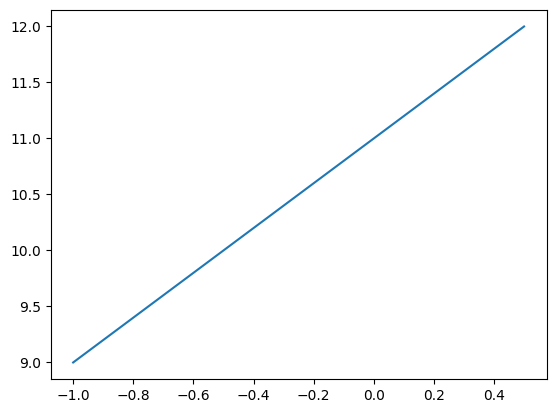

In [24]:
import matplotlib.pyplot as plt

plt.plot(x.detach().numpy(), y.detach().numpy()) #.detach() 텐서의 기능만 반환해서 알려줌(객체에 뭔가 처리를 해줘도 추적에 관련된것을 그리지 않음.)

In [25]:
y.backward(torch.ones_like(y))
display(x.grad)

tensor([2., 2., 2., 2.])

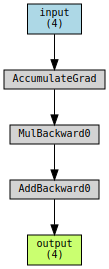

In [26]:
cg = torchviz.make_dot(y, params = {'input': x , "output" : y})

cg.render("graph", view = True)
display(cg)

In [27]:
y2 = 5 * x
y2.backward(torch.ones_like(y2))

display(x.grad) #x.grad를 초기화 시켜주지 않았기 때문에 앞서있던 그래디언트와 더해져서 7로 나온것

tensor([7., 7., 7., 7.])

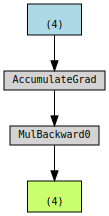

In [28]:
cg = torchviz.make_dot(y2)
display(cg)

In [30]:
def print_ten(x):
  print(f"{x.requires_grad =} \n {x.is_leaf=}\n{x.grad_fn=}\n{x.grad=}")

print_ten(x)

x.requires_grad =True 
 x.is_leaf=True
x.grad_fn=None
x.grad=tensor([7., 7., 7., 7.])


In [31]:
a = 2 *x + 10

a.retain_grad()

b = 3 * a
b.retain_grad()

c = 2*b
c.retain_grad()

l = torch.sum(c)
display(x)
display(l)

tensor([-1.0000, -0.5000,  0.0000,  0.5000], requires_grad=True)

tensor(228., grad_fn=<SumBackward0>)

In [32]:
l.backward()

for c in [x,a,b,c]:
  print_ten(c)
  print('--------')
  c.grad.zero_()

x.requires_grad =True 
 x.is_leaf=True
x.grad_fn=None
x.grad=tensor([19., 19., 19., 19.])
--------
x.requires_grad =True 
 x.is_leaf=False
x.grad_fn=<AddBackward0 object at 0x7d9edc2c5fc0>
x.grad=tensor([6., 6., 6., 6.])
--------
x.requires_grad =True 
 x.is_leaf=False
x.grad_fn=<MulBackward0 object at 0x7d9edc2c5fc0>
x.grad=tensor([2., 2., 2., 2.])
--------
x.requires_grad =True 
 x.is_leaf=False
x.grad_fn=<MulBackward0 object at 0x7d9edc2c5fc0>
x.grad=tensor([1., 1., 1., 1.])
--------
